## Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera
matplotlib/seaborngrafer i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att
referera till dem. Notera att du behöver ställa in bakgrundsfärg när du sparar matplotlibgrafer, annars blir de
transparenta och svåra att läsa.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar, clutter ska tas bort, jobba
med attention mha färger mm.

## Uppgift 0 - uppvärmning med riket
- I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn

a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
respektive dataframe så du får något liknande som nedan.






In [ ]:
import pandas as pd

df_riket = pd.read_excel("../data/riket2023_åk9_np.xlsx", skiprows=8)

df_riket.columns = ["Plats", "Huvudman", "Totalt", "Flickor (A-F)", "Pojkar (A-F)",
              "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)",
              "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"]



df_riket


b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.


In [ ]:
# Data för betyg totalt men också i procentform för de som fått A-E. Där har jag också gjort om det till decimail så man kan räkna på det
elevbetyg_totalt = 106766
flickor_totalt_betyg = 51548
pojkar_totalt_betyg = 55218
betyg_A_E_totalt = 89.1 / 100
betyg_A_E_flickor = 88.7 / 100
betyg_A_E_pojkar = 89.5 / 100

# Beräkna det faktiska antalet elever med A-E betyg
betyg_A_E_totalt = elevbetyg_totalt * betyg_A_E_totalt
betyg_A_E_flickor = flickor_totalt_betyg * betyg_A_E_flickor
betyg_A_E_pojkar = pojkar_totalt_betyg * betyg_A_E_pojkar

# Beräkna antalet elever med F betyg samt avrundar
antal_F_totalt = round(elevbetyg_totalt - betyg_A_E_totalt)
antal_F_flickor = round(flickor_totalt_betyg - betyg_A_E_flickor)
antal_F_pojkar = round(pojkar_totalt_betyg - betyg_A_E_pojkar)

resultat=print(f"Totalt antal elever som har fått F i matematik: {antal_F_totalt}\n"
        f"Antal flickor som har fått F i matematik: {antal_F_flickor}\n"
        f"Antal pojkar som har fått F i matematik: {antal_F_pojkar}")

c) Rita ett stapeldiagram på totala poängen för de olika ämnena.


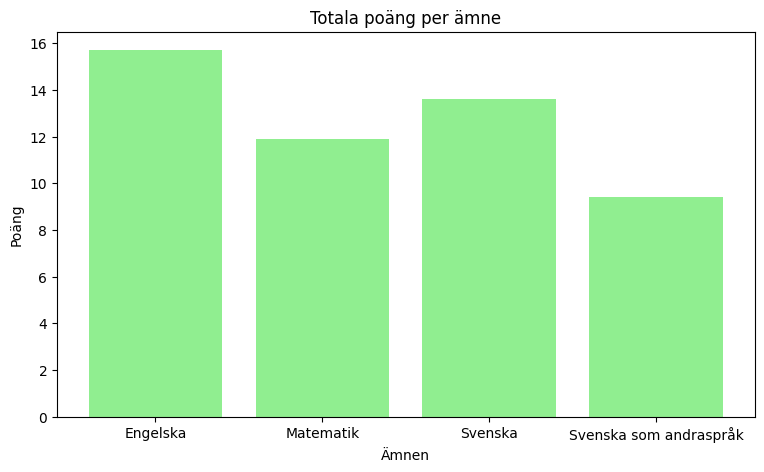

In [37]:
import matplotlib.pyplot as plt

subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
points = [15.7, 11.9, 13.6, 9.4]  

plt.figure(figsize=(9, 5))
plt.bar(subjects, points, color="Lightgreen")
plt.title('Totala poäng per ämne')
plt.xlabel('Ämnen')
plt.ylabel('Poäng')
plt.show()

d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.


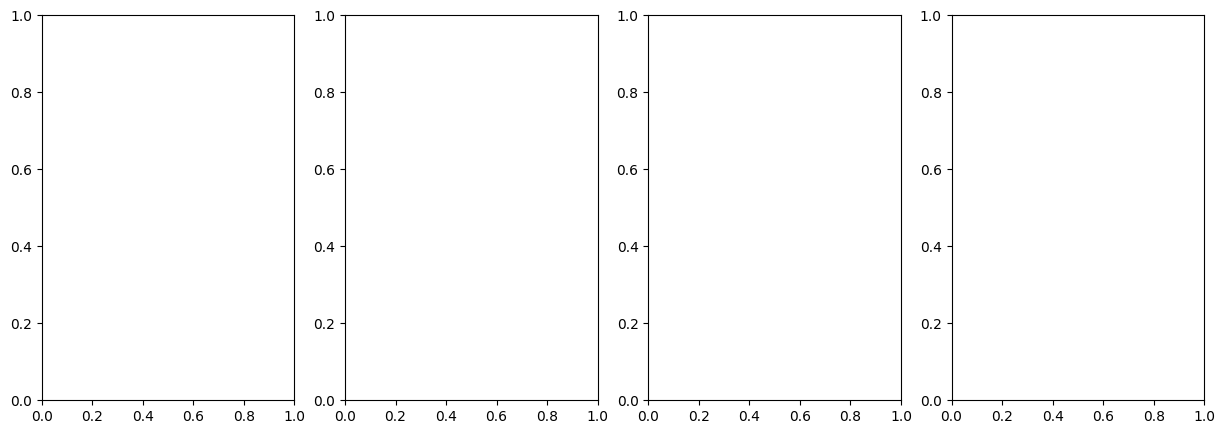

In [52]:
# Skapar en figur och subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))  # Skapar 1 rad med 4 kolumner av subplots

plt.show()


e) Rita ett stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.


## Uppgift 1 - uppvärmning betyg och prov
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.


a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.

b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.


## Uppgift 2 - KPIer & EDA
Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på en eller flera
dataset som ni får söka själva. Ni får inte ta dataseten som ni redan jobbat med i uppgift 0 och 1. Excel och eller csv-filer
kan ni hitta i skolverkets statistik
Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du
använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla
visualiseringar.